### Tuning Observation

#### Load Dataset

In [4]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [5]:
# Load Dataset
path = './base/l1.csv'
data = pd.read_csv(path)

# Displaying the first few rows of the dataset to understand its structure
data.head()

,Time,ARIMA,SARIMA,ETS,GP,RNN,LSTM,CNN,GRU,TCN,Actual,Raw
0,2023-09-08 02:39:20,7390.726635,7368.670382,6571.133851,64.393757,7580.1430,7154.3604,7500.4854,7422.9053,6899.3740,7408.404767,9210.0
1,2023-09-08 02:39:25,7536.177200,7360.831983,5557.353517,64.393673,7940.8857,7429.4300,7648.6570,7372.8213,7276.6245,7516.520443,5120.0
2,2023-09-08 02:39:30,7639.647900,7125.751017,4941.243137,64.393590,7616.6800,7356.2964,7692.3640,7103.8940,7587.7847,7347.992762,7500.0
3,2023-09-08 02:39:35,7713.254942,6812.833747,4179.479375,64.393506,7147.9985,7058.5435,7004.3210,6729.4400,6163.3755,6743.658715,7660.0
4,2023-09-08 02:39:40,7765.617558,6630.417978,3857.027503,64.393421,6494.2670,6823.2515,6639.0327,6596.7530,6795.9990,5761.925218,6520.0


#### Find Pearson Correlation

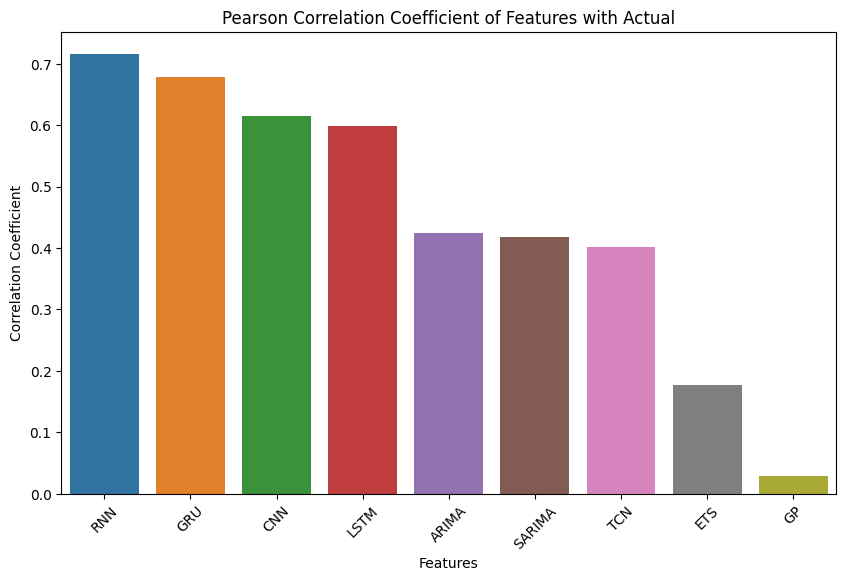

,Correlation with Actual
RNN,0.715803
GRU,0.677632
CNN,0.614538
LSTM,0.598597
ARIMA,0.425165
SARIMA,0.418597
TCN,0.402214
ETS,0.176964
GP,0.028844


In [6]:
# Calculating Pearson correlation coefficient between each feature and the 'Actual' column
features = ['ARIMA', 'SARIMA', 'ETS', 'GP', 'RNN', 'LSTM', 'CNN', 'GRU', 'TCN']
correlation_target = 'Actual'
prediction_target = 'Raw'
rmse_target = 'Raw'
correlations = {feature: pearsonr(data[feature], data[correlation_target])[0] for feature in features}

# Sorting the features based on their correlation in descending order
sorted_features = sorted(correlations, key=correlations.get, reverse=True)

# Displaying the correlation coefficients
correlation_df = pd.DataFrame.from_dict(correlations, orient='index', columns=['Correlation with Actual'])
correlation_df_sorted = correlation_df.reindex(sorted_features)

# Plotting the correlations
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_df_sorted.index, y=correlation_df_sorted['Correlation with Actual'])
plt.title('Pearson Correlation Coefficient of Features with Actual')
plt.xticks(rotation=45)
plt.ylabel('Correlation Coefficient')
plt.xlabel('Features')
plt.show()

correlation_df_sorted

In [7]:
# Recalculating Pearson correlation coefficient between each feature and the 'Actual' column
numeric_columns = features + [prediction_target]
numeric_data = data[numeric_columns]
cleaned_data = numeric_data.dropna(subset=[prediction_target])
compare_rmse_column = data[rmse_target].dropna().iloc[1000:]

# Preparing the training and testing datasets
train_data = cleaned_data.iloc[:1000]
test_data = cleaned_data.iloc[1000:]

#### Linear Regression

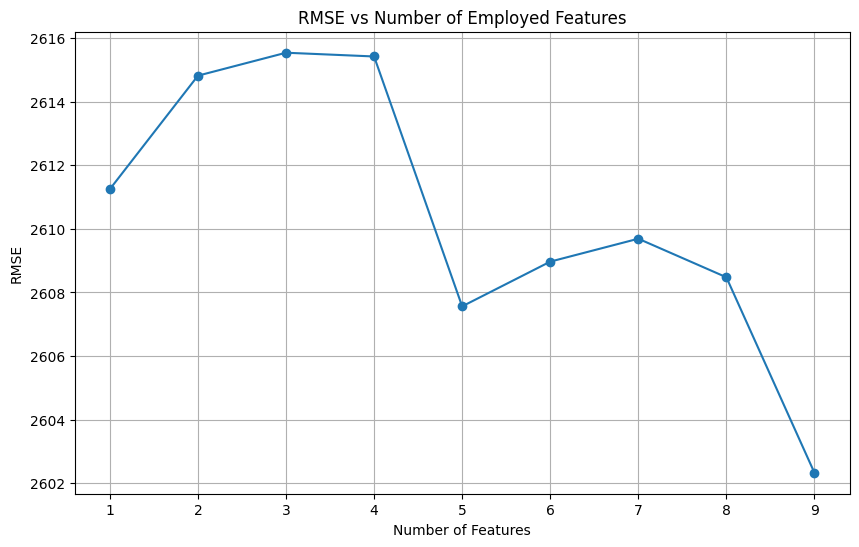

[2611.2482118059024,
 2614.8142668234186,
 2615.5355189177885,
 2615.4176483015913,
 2607.563422865768,
 2608.968924383298,
 2609.689227209182,
 2608.47798966387,
 2602.3341588755425]

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# List to store RMSE values for each iteration
rmse_values = []

# Looping through the features based on their sorted correlation
for i in range(1, len(sorted_features) + 1):
    # Selecting the top i features
    selected_features = sorted_features[:i]

    # Training the model
    model = LinearRegression()
    model.fit(train_data[selected_features], train_data[prediction_target])

    # Testing the model
    predictions = model.predict(test_data[selected_features])
    rmse = mean_squared_error(compare_rmse_column, predictions, squared=False)
    rmse_values.append(rmse)

# Plotting the graph of RMSE vs number of employed features
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(sorted_features) + 1), rmse_values, marker='o')
plt.title('RMSE vs Number of Employed Features')
plt.xlabel('Number of Features')
plt.ylabel('RMSE')
plt.xticks(range(1, len(sorted_features) + 1))
plt.grid(True)
plt.show()

# Displaying RMSE values
rmse_values

#### Random Forest

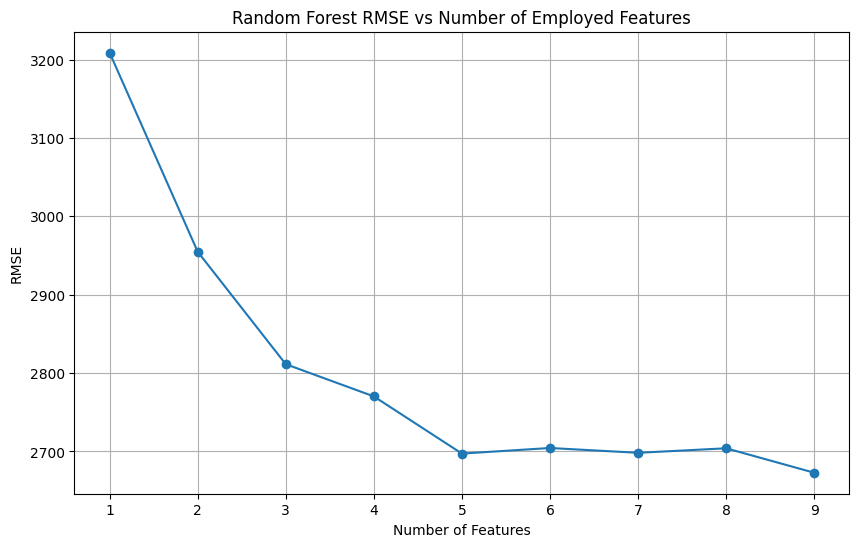

[3208.7928899543467,
 2954.815569696555,
 2811.3151587104735,
 2770.222281110308,
 2697.2505291404127,
 2704.3729880539922,
 2698.2337420136855,
 2704.0025669877014,
 2672.8173933553235]

In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Assuming cleaned_data, train_data, test_data are already prepared
# and sorted_features contains the features sorted by their correlation

# List to store RMSE values for each iteration using Random Forest
rf_rmse_values = []

# Looping through the features based on their sorted correlation
for i in range(1, len(sorted_features) + 1):
    # Selecting the top i features
    selected_features = sorted_features[:i]

    # Training the Random Forest model
    rf_model = RandomForestRegressor()
    rf_model.fit(train_data[selected_features], train_data[prediction_target])

    # Testing the Random Forest model
    rf_predictions = rf_model.predict(test_data[selected_features])
    rf_rmse = mean_squared_error(compare_rmse_column, rf_predictions, squared=False)
    rf_rmse_values.append(rf_rmse)

# Plotting the graph of RMSE vs number of employed features for Random Forest
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(sorted_features) + 1), rf_rmse_values, marker='o')
plt.title('Random Forest RMSE vs Number of Employed Features')
plt.xlabel('Number of Features')
plt.ylabel('RMSE')
plt.xticks(range(1, len(sorted_features) + 1))
plt.grid(True)
plt.show()

# Displaying RMSE values for Random Forest
rf_rmse_values

#### Feed Forward Neural Network

2023-11-30 17:03:09.795630: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


8/8 [==============================] - 0s 2ms/step


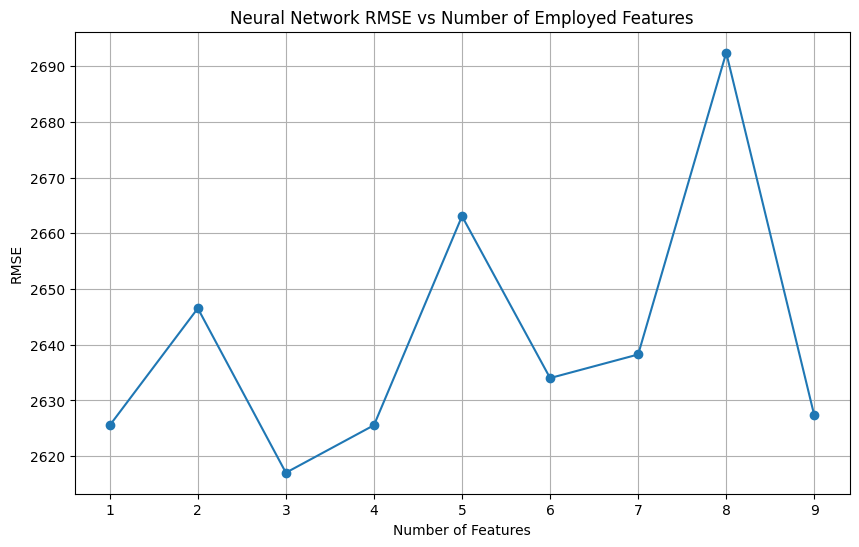

[2625.5231937724257,
 2646.527959839498,
 2617.0176160730316,
 2625.54593590833,
 2663.066261746615,
 2634.009809860908,
 2638.244724211953,
 2692.409774162896,
 2627.291195164899]

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming cleaned_data, train_data, test_data are already prepared
# and sorted_features contains the features sorted by their correlation

# List to store RMSE values for each iteration using Neural Network
nn_rmse_values = []

# Looping through the features based on their sorted correlation
for i in range(1, len(sorted_features) + 1):
    # Selecting the top i features
    selected_features = sorted_features[:i]
    X_train = train_data[selected_features].values
    X_test = test_data[selected_features].values
    y_train = train_data[prediction_target].values
    y_test = test_data[prediction_target].values

    # Define the Neural Network model architecture
    model = Sequential([
        Dense(10, activation="relu", input_shape=(X_train.shape[1],)),
        Dense(10, activation="relu"),
        Dense(1)
    ])

    # Compile the model
    model.compile(optimizer="adam", loss="mse")

    # Train the model
    model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0, validation_data=(X_test, y_test))

    # Predict using the model
    nn_predictions = model.predict(X_test).flatten()

    # Calculate RMSE
    nn_rmse = mean_squared_error(compare_rmse_column, nn_predictions, squared=False)
    nn_rmse_values.append(nn_rmse)

# Plotting the graph of RMSE vs number of employed features for Neural Network
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(sorted_features) + 1), nn_rmse_values, marker='o')
plt.title('Neural Network RMSE vs Number of Employed Features')
plt.xlabel('Number of Features')
plt.ylabel('RMSE')
plt.xticks(range(1, len(sorted_features) + 1))
plt.grid(True)
plt.show()

# Displaying RMSE values for Neural Network
nn_rmse_values

#### Weighted Average

Using top 1 features
Using top 2 features
Using top 3 features
Using top 4 features
Using top 5 features
Using top 6 features
Using top 7 features
Using top 8 features
Using top 9 features


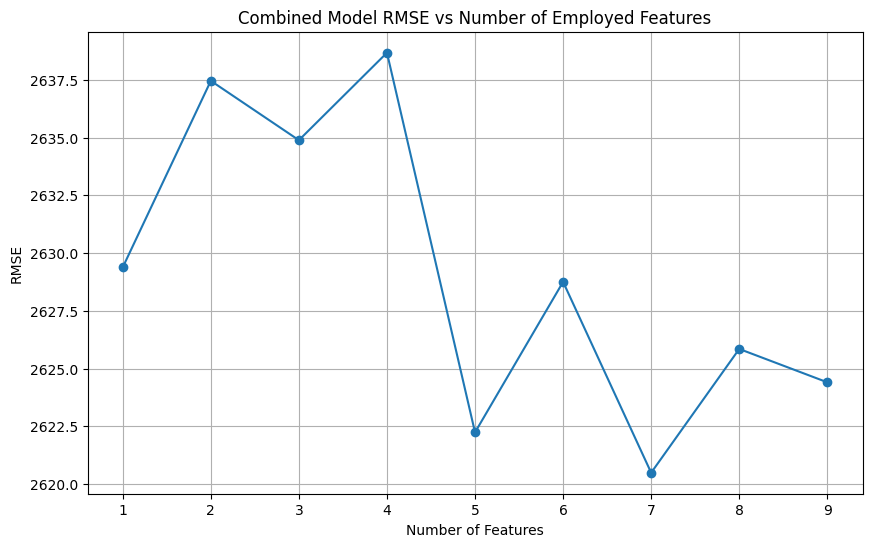

[2629.3841571323683,
 2637.455274340752,
 2634.8860663196083,
 2638.6718782320263,
 2622.240385545711,
 2628.753881981736,
 2620.4936147311428,
 2625.85050106098,
 2624.407118617748]

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error
import numpy as np

# List to store RMSE values for combined model predictions
combined_rmse_values = []

# Looping through the features based on their sorted correlation
for i in range(1, len(sorted_features) + 1):
    print(f"Using top {i} features")
    selected_features = sorted_features[:i]
    
    # Preparing data
    X_train = train_data[selected_features].values
    X_test = test_data[selected_features].values
    y_train = train_data[prediction_target].values
    y_test = test_data[prediction_target].values

    # Initialize models
    linear_model = LinearRegression()
    rf_model = RandomForestRegressor()
    nn_model = Sequential([
        Dense(10, activation="relu", input_shape=(X_train.shape[1],)),
        Dense(10, activation="relu"),
        Dense(1)
    ])
    nn_model.compile(optimizer="adam", loss="mse")

    # Train models
    linear_model.fit(X_train, y_train)
    rf_model.fit(X_train, y_train)
    nn_model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

    # Initial weights
    weights = {'linear': 1/3, 'random_forest': 1/3, 'neural_network': 1/3}
    cumulative_predictions = np.zeros(len(X_test))
    cumulative_linear_predictions = np.zeros(len(X_test))
    cumulative_rf_predictions = np.zeros(len(X_test))
    cumulative_nn_predictions = np.zeros(len(X_test))
    cumulative_actuals = np.zeros(len(X_test))

    # Nested loop for dynamic weight adjustment
    for t in range(len(X_test)):
        # Predicting one value at a time
        linear_pred = linear_model.predict([X_test[t]])[0]
        rf_pred = rf_model.predict([X_test[t]])[0]
        nn_pred = nn_model.predict([X_test[t:t+1]], verbose=0).flatten()[0]

        # Update cumulative predictions and actuals
        cumulative_predictions[t] = linear_pred * weights['linear'] + rf_pred * weights['random_forest'] + nn_pred * weights['neural_network']
        cumulative_linear_predictions[t] = linear_pred
        cumulative_rf_predictions[t] = rf_pred
        cumulative_nn_predictions[t] = nn_pred
        cumulative_actuals[t] = y_test[t]

        # Update RMSE and weights if not the first iteration
        if t > 0:
            # Update RMSE based on cumulative data
            historical_rmse = {
                'linear': mean_squared_error(cumulative_actuals[:t+1], cumulative_linear_predictions[:t+1], squared=False),
                'random_forest': mean_squared_error(cumulative_actuals[:t+1], cumulative_rf_predictions[:t+1], squared=False),
                'neural_network': mean_squared_error(cumulative_actuals[:t+1], cumulative_nn_predictions[:t+1], squared=False)
            }

            # Update weights
            exp_weights = {model: np.exp(-0.01 * rmse) for model, rmse in historical_rmse.items()}
            total_weight = sum(exp_weights.values())
            weights = {model: weight / total_weight for model, weight in exp_weights.items()}

    # Calculate RMSE for combined predictions
    combined_rmse = mean_squared_error(y_test, cumulative_predictions, squared=False)
    combined_rmse_values.append(combined_rmse)

# Plotting the graph of RMSE vs number of employed features for the combined model
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(sorted_features) + 1), combined_rmse_values, marker='o')
plt.title('Combined Model RMSE vs Number of Employed Features')
plt.xlabel('Number of Features')
plt.ylabel('RMSE')
plt.xticks(range(1, len(sorted_features) + 1))
plt.grid(True)
plt.show()

# Displaying RMSE values for the combined model
combined_rmse_values